In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests
from bs4 import BeautifulSoup
import pickle

def url_to_transcript(url):
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")
    text = [p.text for p in soup.find(class_="transcript-inner").find_all('p')]
    print(url)
    return text

urls = ['https://millercenter.org/the-presidency/presidential-speeches/january-20-1969-first-inaugural-address',
        'https://millercenter.org/the-presidency/presidential-speeches/january-20-1973-second-inaugural-address',
        'https://millercenter.org/the-presidency/presidential-speeches/january-20-1977-inaugural-address',
        'https://millercenter.org/the-presidency/presidential-speeches/january-20-1981-first-inaugural-address',
        'https://millercenter.org/the-presidency/presidential-speeches/january-21-1985-second-inaugural-address',
        'https://millercenter.org/the-presidency/presidential-speeches/january-20-1989-inaugural-address',
        'https://millercenter.org/the-presidency/presidential-speeches/january-20-1993-first-inaugural',
        'https://millercenter.org/the-presidency/presidential-speeches/january-20-1997-second-inaugural',
        'https://millercenter.org/the-presidency/presidential-speeches/january-20-2001-first-inaugural-address',
        'https://millercenter.org/the-presidency/presidential-speeches/january-20-2005-second-inaugural-address-0',
        'https://millercenter.org/the-presidency/presidential-speeches/january-20-2009-inaugural-address',
        'https://millercenter.org/the-presidency/presidential-speeches/january-21-2013-second-inaugural-address',
        'https://millercenter.org/the-presidency/presidential-speeches/january-20-2017-inaugural-address']

presidents = ['nixon1', 'nixon2', 'carter', 'reagan1', 'reagan2', 'bushh', 'clinton1', 'clinton2', 'bushw1', 'bushw2', 'obama1', 'obama2', 'trump']

In [3]:
transcripts = [url_to_transcript(u) for u in urls]

https://millercenter.org/the-presidency/presidential-speeches/january-20-1969-first-inaugural-address
https://millercenter.org/the-presidency/presidential-speeches/january-20-1973-second-inaugural-address
https://millercenter.org/the-presidency/presidential-speeches/january-20-1977-inaugural-address
https://millercenter.org/the-presidency/presidential-speeches/january-20-1981-first-inaugural-address
https://millercenter.org/the-presidency/presidential-speeches/january-21-1985-second-inaugural-address
https://millercenter.org/the-presidency/presidential-speeches/january-20-1989-inaugural-address
https://millercenter.org/the-presidency/presidential-speeches/january-20-1993-first-inaugural
https://millercenter.org/the-presidency/presidential-speeches/january-20-1997-second-inaugural
https://millercenter.org/the-presidency/presidential-speeches/january-20-2001-first-inaugural-address
https://millercenter.org/the-presidency/presidential-speeches/january-20-2005-second-inaugural-address-0
ht

In [4]:
for i, c in enumerate(presidents):
    with open("transcripts/" + c + ".txt", "wb") as file:
        pickle.dump(transcripts[i], file)

In [5]:
data = {}
for i, c in enumerate(presidents):
    with open("transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [6]:
data.keys()

dict_keys(['nixon1', 'nixon2', 'carter', 'reagan1', 'reagan2', 'bushh', 'clinton1', 'clinton2', 'bushw1', 'bushw2', 'obama1', 'obama2', 'trump'])

In [7]:
data['reagan2'][:5]

['Senator Mathias, Chief Justice Burger, Vice President Bush, Speaker O\'Neill, Senator Dole, reverend clergy, and members of my family and friends and my fellow citizens:\r\nThis day has been made brighter with the presence here of one who, for a time, has been absent. Senator John Stennis, God bless you and welcome back.\r\nThere is, however, one who is not with us today. Representative Gillis Long of Louisiana left us last night. And I wonder if we could all join in a moment of silent prayer.\r\n[The President resumed speaking after a moment of silence. ]\r\nAmen.\r\nThere are no words adequate to express my thanks for the great honor that you\'ve bestowed on me. I\'ll do my utmost to be deserving of your trust.\r\nThis is, as Senator Mathias told us, the 50th time that we, the people, have celebrated this historic occasion. When the first President, George Washington, placed his hand upon the Bible, he stood less than a single day\'s journey by horseback from raw, untamed wildernes

In [8]:
# Let's take a look at out data again
next(iter(data.keys()))

'nixon1'

In [9]:
# Notice that our directory is currently in key: president, value: list 
next(iter(data.values()))

['Senator Dirksen, Mr. Chief Justice, Mr. Vice President, President Johnson, Vice President Humphrey, my fellow Americans--and my fellow citizens of the world community:\r\nI ask you to share with me today the majesty of this moment. In the orderly transfer of power, we celebrate the unity that keeps us free.\r\nEach moment in history is a fleeting time, precious and unique. But some stand out as moments of beginning, in which courses are set that shape decades or centuries.\r\nThis can be such a moment.\r\nForces now are converging that make possible, for the first time, the hope that many of man\'s deepest aspirations can at last be realized. The spiraling pace of change allows us to contemplate, within our own lifetime, advances that once would have taken centuries.\r\nIn throwing wide the horizons of space, we have discovered new horizons on earth.\r\nFor the first time, because the people of the world want peace, and the leaders of the world are afraid of war, the times are on the

In [10]:
# We are going to change this to key: president, value: string format
def combine_text(list_of_text):
    combined_text = ' '.join(list_of_text)
    return combined_text

In [11]:
# Combine it!
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}

In [12]:
# We can either keep it in dictionary format or put it into pandas dataset
import pandas as pd
pd.set_option('max_colwidth', 150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

,transcript
bushh,"Mr. Chief Justice, Mr. President, Vice President Quayle, Senator Mitchell, Speaker Wright, Senator Dole, Congressman Michel, and fellow citizens, ..."
bushw1,"President Clinton, distinguished guests and my fellow citizens, the peaceful transfer of authority is rare in history, yet common in our country. ..."
bushw2,"Vice President Cheney, Mr. Chief Justice, President Carter, President Bush, President Clinton, reverend clergy, distinguished guests, fellow citiz..."
carter,"For myself and for our Nation, I want to thank my predecessor for all he has done to heal our land. In this outward and physical ceremony we attes..."
clinton1,"My fellow citizens, today we celebrate the mystery of American renewal. This ceremony is held in the depth of winter, but by the words we speak an..."
clinton2,"My fellow citizens, at this last Presidential Inauguration of the 20th century, let us lift our eyes toward the challenges that await us in the ne..."
nixon1,"Senator Dirksen, Mr. Chief Justice, Mr. Vice President, President Johnson, Vice President Humphrey, my fellow Americans--and my fellow citizens of..."
nixon2,"Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share ..."
obama1,"I stand here today humbled by the task before us, grateful for the trust you have bestowed, mindful of the sacrifices borne by our ancestors. I th..."
obama2,"\r\nVice President Biden, Mr. Chief Justice,\r\nmembers of the United States Congress, distinguished guests, and fellow citizens: \r\n \r\nEach t..."


In [13]:
# Let's take a look at the transcript for Obama
data_df.transcript.loc['obama1']

'I stand here today humbled by the task before us, grateful for the trust you have bestowed, mindful of the sacrifices borne by our ancestors. I thank President Bush for his service to our nation, as well as the generosity and cooperation he has shown throughout this transition.\r\nForty-four Americans have now taken the presidential oath. The words have been spoken during rising tides of prosperity and the still waters of peace. Yet, every so often the oath is taken amidst gathering clouds and raging storms. At these moments, America has carried on not simply because of the skill or vision of those in high office, but because We the People have remained faithful to the ideals of our forbearers, and true to our founding documents.\r\nSo it has been. So it must be with this generation of Americans.\r\nThat we are in the midst of crisis is now well understood. Our nation is at war, against a far-reaching network of violence and hatred. Our economy is badly weakened, a consequence of gree

In [14]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):

    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [15]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_df.transcript.apply(round1))
data_clean

,transcript
bushh,mr chief justice mr president vice president quayle senator mitchell speaker wright senator dole congressman michel and fellow citizens neighbors ...
bushw1,president clinton distinguished guests and my fellow citizens the peaceful transfer of authority is rare in history yet common in our country with...
bushw2,vice president cheney mr chief justice president carter president bush president clinton reverend clergy distinguished guests fellow citizens on t...
carter,for myself and for our nation i want to thank my predecessor for all he has done to heal our land in this outward and physical ceremony we attest ...
clinton1,my fellow citizens today we celebrate the mystery of american renewal this ceremony is held in the depth of winter but by the words we speak and t...
clinton2,my fellow citizens at this last presidential inauguration of the century let us lift our eyes toward the challenges that await us in the next cen...
nixon1,senator dirksen mr chief justice mr vice president president johnson vice president humphrey my fellow americansand my fellow citizens of the worl...
nixon2,mr vice president mr speaker mr chief justice senator cook mrs eisenhower and my fellow citizens of this great and good country we share together\...
obama1,i stand here today humbled by the task before us grateful for the trust you have bestowed mindful of the sacrifices borne by our ancestors i thank...
obama2,\r\nvice president biden mr chief justice\r\nmembers of the united states congress distinguished guests and fellow citizens \r\n \r\neach time we...


In [16]:
# Apply a second round of cleaning
def clean_text_round2(text):
    text = re.sub('[''""...]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [17]:
# Let's taake a look at the updated text
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))
data_clean

,transcript
bushh,mr chief justice mr president vice president quayle senator mitchell speaker wright senator dole congressman michel and fellow citizens neighbors ...
bushw1,president clinton distinguished guests and my fellow citizens the peaceful transfer of authority is rare in history yet common in our country with...
bushw2,vice president cheney mr chief justice president carter president bush president clinton reverend clergy distinguished guests fellow citizens on t...
carter,for myself and for our nation i want to thank my predecessor for all he has done to heal our land in this outward and physical ceremony we attest ...
clinton1,my fellow citizens today we celebrate the mystery of american renewal this ceremony is held in the depth of winter but by the words we speak and t...
clinton2,my fellow citizens at this last presidential inauguration of the century let us lift our eyes toward the challenges that await us in the next cen...
nixon1,senator dirksen mr chief justice mr vice president president johnson vice president humphrey my fellow americansand my fellow citizens of the worl...
nixon2,mr vice president mr speaker mr chief justice senator cook mrs eisenhower and my fellow citizens of this great and good country we share together\...
obama1,i stand here today humbled by the task before us grateful for the trust you have bestowed mindful of the sacrifices borne by our ancestors i thank...
obama2,\rvice president biden mr chief justice\rmembers of the united states congress distinguished guests and fellow citizens \r \reach time we gather ...


In [18]:
# Let's take a look at our dataframe
data_df

,transcript
bushh,"Mr. Chief Justice, Mr. President, Vice President Quayle, Senator Mitchell, Speaker Wright, Senator Dole, Congressman Michel, and fellow citizens, ..."
bushw1,"President Clinton, distinguished guests and my fellow citizens, the peaceful transfer of authority is rare in history, yet common in our country. ..."
bushw2,"Vice President Cheney, Mr. Chief Justice, President Carter, President Bush, President Clinton, reverend clergy, distinguished guests, fellow citiz..."
carter,"For myself and for our Nation, I want to thank my predecessor for all he has done to heal our land. In this outward and physical ceremony we attes..."
clinton1,"My fellow citizens, today we celebrate the mystery of American renewal. This ceremony is held in the depth of winter, but by the words we speak an..."
clinton2,"My fellow citizens, at this last Presidential Inauguration of the 20th century, let us lift our eyes toward the challenges that await us in the ne..."
nixon1,"Senator Dirksen, Mr. Chief Justice, Mr. Vice President, President Johnson, Vice President Humphrey, my fellow Americans--and my fellow citizens of..."
nixon2,"Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share ..."
obama1,"I stand here today humbled by the task before us, grateful for the trust you have bestowed, mindful of the sacrifices borne by our ancestors. I th..."
obama2,"\r\nVice President Biden, Mr. Chief Justice,\r\nmembers of the United States Congress, distinguished guests, and fellow citizens: \r\n \r\nEach t..."


In [19]:
# Let's add the presidents' full names as well
full_names = ['George H. Bush', 'George W. Bush', 'George W. Bush2', 'Jimmy Carter', 'Bill Clinton', 'Bill Clinton2', 'Richard Nixon', 'Richard Nixon2', 'Barack Obama', 'Barack Obama2', 'Ronald Reagan', 'Ronald Reagan2', 'Donald Trump']

data_df['full_name'] = full_names
data_df

,transcript,full_name
bushh,"Mr. Chief Justice, Mr. President, Vice President Quayle, Senator Mitchell, Speaker Wright, Senator Dole, Congressman Michel, and fellow citizens, ...",George H. Bush
bushw1,"President Clinton, distinguished guests and my fellow citizens, the peaceful transfer of authority is rare in history, yet common in our country. ...",George W. Bush
bushw2,"Vice President Cheney, Mr. Chief Justice, President Carter, President Bush, President Clinton, reverend clergy, distinguished guests, fellow citiz...",George W. Bush2
carter,"For myself and for our Nation, I want to thank my predecessor for all he has done to heal our land. In this outward and physical ceremony we attes...",Jimmy Carter
clinton1,"My fellow citizens, today we celebrate the mystery of American renewal. This ceremony is held in the depth of winter, but by the words we speak an...",Bill Clinton
clinton2,"My fellow citizens, at this last Presidential Inauguration of the 20th century, let us lift our eyes toward the challenges that await us in the ne...",Bill Clinton2
nixon1,"Senator Dirksen, Mr. Chief Justice, Mr. Vice President, President Johnson, Vice President Humphrey, my fellow Americans--and my fellow citizens of...",Richard Nixon
nixon2,"Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share ...",Richard Nixon2
obama1,"I stand here today humbled by the task before us, grateful for the trust you have bestowed, mindful of the sacrifices borne by our ancestors. I th...",Barack Obama
obama2,"\r\nVice President Biden, Mr. Chief Justice,\r\nmembers of the United States Congress, distinguished guests, and fellow citizens: \r\n \r\nEach t...",Barack Obama2


In [20]:
# Let's pickle it for later use
data_df.to_pickle("corpus.pkl")

In [21]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stopwords.
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

,abandon,abandoned,abandonment,abiding,ability,able,abolished,abraham,abroad,absent,...,yes,yesterday,yesterdays,yielded,yielding,yields,young,youngest,youth,youve
bushh,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,1,4,0,0,0
bushw1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
bushw2,2,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
carter,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
clinton1,0,0,0,0,0,1,0,0,1,0,...,1,0,1,0,0,0,2,0,0,0
clinton2,0,0,0,0,0,0,1,0,0,0,...,4,0,0,0,0,0,1,0,0,0
nixon1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,2,0
nixon2,0,0,0,0,0,1,0,0,8,0,...,0,0,0,0,0,0,1,0,0,0
obama1,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
obama2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [22]:
# Let's pickle it for later use
data_dtm.to_pickle("dtm.pkl")

In [23]:
# Let's also pickle the cleaned data (before we put it in document-term matrix format) and the CountVectorizer object
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open ("cv.pkl", "wb"))

In [24]:
# Read the document term-matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,bushh,bushw1,bushw2,carter,clinton1,clinton2,nixon1,nixon2,obama1,obama2,reagan1,reagan2,trump
abandon,0,0,2,0,0,0,0,0,0,0,0,0,0
abandoned,0,0,0,0,0,0,0,0,1,0,0,0,0
abandonment,0,1,0,0,0,0,0,0,0,0,0,0,0
abiding,0,0,0,1,0,0,0,0,0,0,0,0,0
ability,0,0,0,0,0,0,0,0,1,0,0,0,0


In [25]:
# Find the top 30 words said by each President
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))
    
top_dict

{'bushh': [('new', 14),
  ('great', 10),
  ('world', 10),
  ('nation', 10),
  ('free', 9),
  ('good', 8),
  ('things', 8),
  ('hand', 8),
  ('friends', 8),
  ('time', 7),
  ('need', 7),
  ('today', 7),
  ('work', 7),
  ('america', 7),
  ('day', 7),
  ('people', 7),
  ('old', 6),
  ('president', 6),
  ('mr', 6),
  ('freedom', 6),
  ('know', 6),
  ('strong', 6),
  ('dont', 6),
  ('make', 6),
  ('breeze', 5),
  ('word', 5),
  ('better', 5),
  ('government', 5),
  ('right', 5),
  ('hope', 5)],
 'bushw1': [('country', 9),
  ('citizens', 9),
  ('story', 9),
  ('america', 8),
  ('nation', 8),
  ('know', 5),
  ('common', 5),
  ('freedom', 5),
  ('new', 5),
  ('courage', 5),
  ('promise', 5),
  ('nations', 5),
  ('americans', 5),
  ('public', 4),
  ('ideals', 4),
  ('duty', 4),
  ('live', 4),
  ('american', 4),
  ('character', 4),
  ('children', 4),
  ('purpose', 4),
  ('civility', 4),
  ('time', 4),
  ('work', 4),
  ('power', 4),
  ('best', 4),
  ('government', 4),
  ('god', 3),
  ('deep', 3),

In [26]:
# Print the top 15 words said by each president
for presidents, top_words in top_dict.items():
    print(presidents)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

bushh
new, great, world, nation, free, good, things, hand, friends, time, need, today, work, america
---
bushw1
country, citizens, story, america, nation, know, common, freedom, new, courage, promise, nations, americans, public
---
bushw2
freedom, liberty, america, nation, country, world, americas, americans, history, time, free, work, justice, day
---
carter
nation, new, strength, spirit, people, dream, world, human, let, freedom, just, nations, moral, times
---
clinton1
world, america, people, americans, today, let, new, change, time, work, fellow, nation, idea, generation
---
clinton2
new, century, nation, time, land, america, people, government, world, promise, let, american, work, citizens
---
nixon1
world, peace, people, let, know, make, voices, earth, new, man, need, moment, forward, today
---
nixon2
let, peace, world, new, america, responsibility, government, home, abroad, nation, americas, years, history, policies
---
obama1
nation, new, america, today, people, let, common, ti

In [27]:
# Look at the most common top words ---> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each President
words = []
for presidents in data.columns:
    top = [word for (word, count) in top_dict[presidents]]
    for t in top:
        words.append(t)
        
words

['new',
 'great',
 'world',
 'nation',
 'free',
 'good',
 'things',
 'hand',
 'friends',
 'time',
 'need',
 'today',
 'work',
 'america',
 'day',
 'people',
 'old',
 'president',
 'mr',
 'freedom',
 'know',
 'strong',
 'dont',
 'make',
 'breeze',
 'word',
 'better',
 'government',
 'right',
 'hope',
 'country',
 'citizens',
 'story',
 'america',
 'nation',
 'know',
 'common',
 'freedom',
 'new',
 'courage',
 'promise',
 'nations',
 'americans',
 'public',
 'ideals',
 'duty',
 'live',
 'american',
 'character',
 'children',
 'purpose',
 'civility',
 'time',
 'work',
 'power',
 'best',
 'government',
 'god',
 'deep',
 'great',
 'freedom',
 'liberty',
 'america',
 'nation',
 'country',
 'world',
 'americas',
 'americans',
 'history',
 'time',
 'free',
 'work',
 'justice',
 'day',
 'know',
 'people',
 'hope',
 'citizens',
 'cause',
 'seen',
 'human',
 'came',
 'tyranny',
 'rights',
 'character',
 'life',
 'states',
 'president',
 'good',
 'united',
 'nation',
 'new',
 'strength',
 'spirit'

In [28]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in 
Counter(words).most_common()

[('nation', 12),
 ('time', 12),
 ('america', 12),
 ('people', 12),
 ('new', 11),
 ('world', 11),
 ('government', 10),
 ('today', 9),
 ('work', 9),
 ('let', 9),
 ('great', 8),
 ('americans', 8),
 ('freedom', 7),
 ('know', 6),
 ('citizens', 6),
 ('american', 6),
 ('day', 5),
 ('president', 5),
 ('make', 5),
 ('nations', 5),
 ('god', 5),
 ('history', 5),
 ('country', 4),
 ('power', 4),
 ('human', 4),
 ('come', 4),
 ('peace', 4),
 ('strong', 3),
 ('right', 3),
 ('children', 3),
 ('americas', 3),
 ('life', 3),
 ('spirit', 3),
 ('just', 3),
 ('generation', 3),
 ('years', 3),
 ('act', 3),
 ('free', 2),
 ('good', 2),
 ('things', 2),
 ('need', 2),
 ('better', 2),
 ('hope', 2),
 ('common', 2),
 ('promise', 2),
 ('character', 2),
 ('best', 2),
 ('liberty', 2),
 ('rights', 2),
 ('states', 2),
 ('united', 2),
 ('strength', 2),
 ('dream', 2),
 ('help', 2),
 ('fellow', 2),
 ('democracy', 2),
 ('responsibility', 2),
 ('union', 2),
 ('earth', 2),
 ('man', 2),
 ('shall', 2),
 ('progress', 2),
 ('words',

In [29]:
#If more than half the Presidents have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['nation',
 'time',
 'america',
 'people',
 'new',
 'world',
 'government',
 'today',
 'work',
 'let',
 'great',
 'americans',
 'freedom']

In [30]:
# Let's update our document-term matrix with new list of stop words
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said', 'applause', 
                  'America', 'Americans', 'freedom', 'nation', 'america', 'americans', 
                  'world', 'americas']

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [31]:
# Let's make some word clouds!
# Terminal Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2", max_font_size=150, random_state=42)

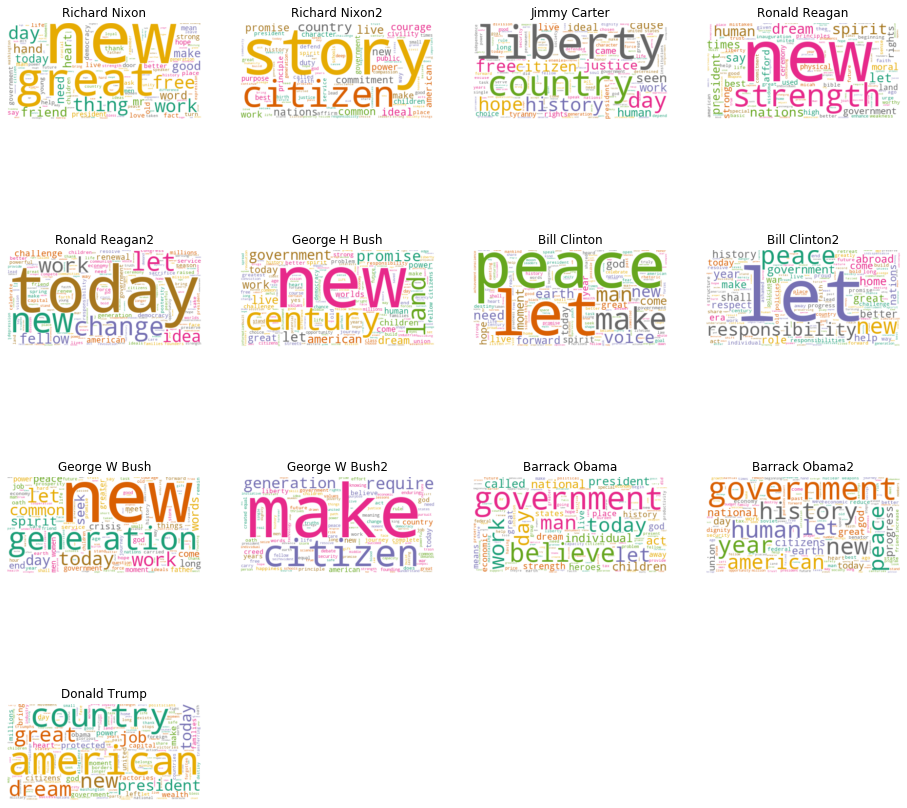

In [32]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 16]

full_names = ['Richard Nixon', 'Richard Nixon2', 'Jimmy Carter', 
              'Ronald Reagan', 'Ronald Reagan2', 'George H Bush', 'Bill Clinton', 'Bill Clinton2', 'George W Bush', 'George W Bush2', 'Barrack Obama', 'Barrack Obama2', 'Donald Trump']

#Create subplots for each president
for index, presidents in enumerate(data.columns):
    wc.generate(data_clean.transcript[presidents])
    
    plt.subplot(4, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

In [33]:
# Find the number of unique words that each President uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for presidents in data.columns:
    uniques = data[presidents].nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['presidents', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

C:\Users\kevin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  


,presidents,unique_words
3,Ronald Reagan,347
7,Bill Clinton2,394
12,Donald Trump,422
1,Richard Nixon2,455
4,Ronald Reagan2,467
5,George H Bush,569
6,Bill Clinton,586
0,Richard Nixon,593
2,Jimmy Carter,598
9,George W Bush2,641


In [34]:
# Calculate the words per minute of each President

# Find the total number of words that a President uses
total_list = []
for presidents in data.columns:
    totals = sum(data[presidents])
    total_list.append(totals)
    
# Comedy special run times from IMDB, in minutes
run_times = [20, 18, 19, 23, 23, 63, 15, 30, 14, 21, 22, 21, 55]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,presidents,unique_words,total_words,run_times,words_per_minute
12,Donald Trump,422,620,55,11.272727
5,George H Bush,569,952,63,15.111111
3,Ronald Reagan,347,467,23,20.304348
7,Bill Clinton2,394,742,30,24.733333
4,Ronald Reagan2,467,682,23,29.652174
1,Richard Nixon2,455,683,18,37.944444
9,George W Bush2,641,937,21,44.619048
10,Barrack Obama,686,1012,22,46.000000
0,Richard Nixon,593,979,20,48.950000
2,Jimmy Carter,598,937,19,49.315789


In [35]:
# Let's read in our document-term matrix
import pandas as pd
import pickle

data = pd.read_pickle('dtm_stop.pkl')
data

,abandon,abandoned,abandonment,abiding,ability,able,abolished,abraham,abroad,absent,...,yes,yesterday,yesterdays,yielded,yielding,yields,young,youngest,youth,youve
bushh,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,1,4,0,0,0
bushw1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
bushw2,2,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
carter,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
clinton1,0,0,0,0,0,1,0,0,1,0,...,1,0,1,0,0,0,2,0,0,0
clinton2,0,0,0,0,0,0,1,0,0,0,...,4,0,0,0,0,0,1,0,0,0
nixon1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,2,0
nixon2,0,0,0,0,0,1,0,0,8,0,...,0,0,0,0,0,0,1,0,0,0
obama1,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
obama2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [36]:
# Import the necessary modules for LDA with gensim
# Terminal / Anaconda Navigator: conda install -c conda-forge gensim
from gensim import matutils, models
import scipy.sparse

# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [37]:
# One of the required inputs is a term-document matrix
tdm = data.transpose()
tdm.head(50)

,bushh,bushw1,bushw2,carter,clinton1,clinton2,nixon1,nixon2,obama1,obama2,reagan1,reagan2,trump
abandon,0,0,2,0,0,0,0,0,0,0,0,0,0
abandoned,0,0,0,0,0,0,0,0,1,0,0,0,0
abandonment,0,1,0,0,0,0,0,0,0,0,0,0,0
abiding,0,0,0,1,0,0,0,0,0,0,0,0,0
ability,0,0,0,0,0,0,0,0,1,0,0,0,0
able,0,0,0,0,1,0,0,1,0,0,0,0,0
abolished,0,0,0,0,0,1,0,0,0,0,0,0,0
abraham,0,0,1,0,0,0,0,0,0,0,1,0,0
abroad,0,0,0,1,1,0,1,8,0,1,0,0,0
absent,0,0,0,0,0,0,0,0,0,0,0,1,0


In [38]:
# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [39]:
# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
cv = pickle.load(open("cv_stop.pkl", "rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [40]:
# Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term),
# we need to specify two other parameters as well - the number of topics and the number of passes
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=50)
lda.print_topics()

[(0,
  '0.007*"new" + 0.005*"government" + 0.004*"great" + 0.004*"human" + 0.004*"free" + 0.004*"liberty" + 0.004*"history" + 0.004*"work" + 0.004*"day" + 0.003*"president"'),
 (1,
  '0.011*"new" + 0.008*"let" + 0.007*"government" + 0.006*"today" + 0.005*"american" + 0.005*"make" + 0.005*"peace" + 0.005*"work" + 0.004*"great" + 0.004*"country"')]

In [41]:
# LDA for num_topics = 4
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, passes=50)
lda.print_topics()

[(0,
  '0.000*"new" + 0.000*"government" + 0.000*"let" + 0.000*"strength" + 0.000*"spirit" + 0.000*"great" + 0.000*"liberty" + 0.000*"nations" + 0.000*"work" + 0.000*"human"'),
 (1,
  '0.008*"government" + 0.007*"today" + 0.006*"let" + 0.006*"new" + 0.006*"american" + 0.005*"work" + 0.004*"country" + 0.004*"president" + 0.004*"great" + 0.004*"make"'),
 (2,
  '0.014*"new" + 0.009*"let" + 0.008*"government" + 0.007*"peace" + 0.006*"great" + 0.006*"make" + 0.005*"today" + 0.005*"american" + 0.005*"years" + 0.005*"century"'),
 (3,
  '0.006*"country" + 0.006*"liberty" + 0.005*"new" + 0.005*"work" + 0.005*"citizens" + 0.004*"day" + 0.004*"history" + 0.004*"common" + 0.004*"today" + 0.003*"nations"')]

In [42]:
# LDA for num_topics = 5
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=5, passes=50)
lda.print_topics()

[(0,
  '0.012*"new" + 0.006*"government" + 0.006*"work" + 0.006*"today" + 0.006*"let" + 0.005*"american" + 0.005*"citizens" + 0.005*"liberty" + 0.004*"century" + 0.004*"history"'),
 (1,
  '0.008*"new" + 0.007*"strength" + 0.006*"spirit" + 0.005*"dream" + 0.005*"human" + 0.004*"nations" + 0.004*"let" + 0.003*"rights" + 0.003*"afford" + 0.003*"moral"'),
 (2,
  '0.007*"country" + 0.007*"american" + 0.007*"new" + 0.006*"make" + 0.005*"citizens" + 0.005*"great" + 0.005*"let" + 0.005*"peace" + 0.004*"god" + 0.004*"today"'),
 (3,
  '0.011*"government" + 0.010*"let" + 0.009*"peace" + 0.008*"new" + 0.005*"make" + 0.005*"believe" + 0.005*"act" + 0.005*"today" + 0.005*"great" + 0.004*"years"'),
 (4,
  '0.009*"new" + 0.006*"great" + 0.006*"free" + 0.005*"good" + 0.005*"friends" + 0.005*"things" + 0.005*"hand" + 0.005*"need" + 0.005*"day" + 0.005*"work"')]

In [43]:
# Let's create a function to pull out nouns from a string of text
from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

In [44]:
# Read in the cleaned data, before the CountVectorizer step
data_clean = pd.read_pickle('data_clean.pkl')
data_clean

,transcript
bushh,mr chief justice mr president vice president quayle senator mitchell speaker wright senator dole congressman michel and fellow citizens neighbors ...
bushw1,president clinton distinguished guests and my fellow citizens the peaceful transfer of authority is rare in history yet common in our country with...
bushw2,vice president cheney mr chief justice president carter president bush president clinton reverend clergy distinguished guests fellow citizens on t...
carter,for myself and for our nation i want to thank my predecessor for all he has done to heal our land in this outward and physical ceremony we attest ...
clinton1,my fellow citizens today we celebrate the mystery of american renewal this ceremony is held in the depth of winter but by the words we speak and t...
clinton2,my fellow citizens at this last presidential inauguration of the century let us lift our eyes toward the challenges that await us in the next cen...
nixon1,senator dirksen mr chief justice mr vice president president johnson vice president humphrey my fellow americansand my fellow citizens of the worl...
nixon2,mr vice president mr speaker mr chief justice senator cook mrs eisenhower and my fellow citizens of this great and good country we share together\...
obama1,i stand here today humbled by the task before us grateful for the trust you have bestowed mindful of the sacrifices borne by our ancestors i thank...
obama2,\rvice president biden mr chief justice\rmembers of the united states congress distinguished guests and fellow citizens \r \reach time we gather ...


In [45]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns = pd.DataFrame(data_clean.transcript.apply(nouns))
data_nouns

,transcript
bushh,mr chief justice mr president vice president senator mitchell speaker congressman michel citizens neighbors friends man place hearts history presi...
bushw1,president clinton guests citizens transfer authority history country oath traditions beginnings thank president clinton service nation thank vice ...
bushw2,vice president cheney mr justice president carter president president clinton clergy guests citizens day law ceremony wisdom constitution commitme...
carter,nation i predecessor land outward ceremony inner strength nation school julia coleman times principles inauguration president i oath office mother...
clinton1,citizens today mystery renewal ceremony depth winter words world spring spring reborn worlds democracy vision courage america founders independenc...
clinton2,citizens inauguration century eyes challenges century fortune time chance edge century millennium edge prospect affairs moment course character de...
nixon1,senator dirksen mr justice mr vice president president johnson vice president americansand citizens world community share today majesty moment tra...
nixon2,vice president mr speaker mr justice senator cook mrs eisenhower citizens country share years america spirit prospect war conflict home today thre...
obama1,i today task trust mindful sacrifices ancestors president bush service nation generosity cooperation transition fortyfour americans oath words tid...
obama2,vice president mr justice members states guests citizens time president strength constitution promise democracy nation colors skin tenets faith or...


In [46]:
# Create a new document-term matrix using only nouns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said', 'applause', 
                  'America', 'Americans', 'freedom', 'nation', 'america', 'americans', 
                  'world', 'americas']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns.transcript)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = data_nouns.index
data_dtmn

,abandonment,ability,abraham,absolutism,abundance,abuse,accomplishment,accomplishments,account,achievement,...,worry,worthy,year,years,yearsthe,yes,yesterday,yesterdays,youth,youve
bushh,0,0,0,0,0,0,0,0,1,0,...,0,0,0,2,0,1,0,0,0,0
bushw1,1,0,0,0,0,1,1,0,0,0,...,0,0,0,2,0,0,0,0,0,0
bushw2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,3,0,0,1,0,0,0
carter,0,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
clinton1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
clinton2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,3,0,3,0,0,0,0
nixon1,0,0,0,0,0,0,0,0,0,2,...,0,0,1,4,1,0,0,0,2,0
nixon2,0,0,0,0,1,0,0,0,0,0,...,0,0,2,7,0,0,0,0,0,0
obama1,0,1,0,0,0,0,0,0,0,0,...,0,0,2,1,0,0,0,0,0,0
obama2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,5,0,0,0,0,0,0


In [47]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [48]:
# Let's start with 2 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=50)
ldan.print_topics()

[(0,
  '0.015*"government" + 0.011*"peace" + 0.008*"today" + 0.007*"history" + 0.006*"president" + 0.006*"day" + 0.005*"home" + 0.005*"responsibility" + 0.005*"years" + 0.005*"man"'),
 (1,
  '0.011*"government" + 0.010*"today" + 0.008*"country" + 0.008*"citizens" + 0.007*"history" + 0.006*"peace" + 0.006*"century" + 0.006*"life" + 0.006*"spirit" + 0.006*"liberty"')]

In [49]:
# Let's try topics = 4
ldan = models.LdaModel(corpus=corpusn, num_topics=4, id2word=id2wordn, passes=50)
ldan.print_topics()

[(0,
  '0.016*"peace" + 0.015*"government" + 0.010*"years" + 0.009*"history" + 0.009*"today" + 0.008*"nations" + 0.008*"country" + 0.008*"citizens" + 0.007*"spirit" + 0.007*"god"'),
 (1,
  '0.015*"today" + 0.009*"president" + 0.009*"country" + 0.008*"government" + 0.007*"day" + 0.006*"children" + 0.006*"power" + 0.005*"hand" + 0.005*"way" + 0.005*"things"'),
 (2,
  '0.016*"government" + 0.011*"century" + 0.009*"today" + 0.008*"land" + 0.006*"promise" + 0.006*"day" + 0.006*"children" + 0.005*"man" + 0.005*"power" + 0.005*"work"'),
 (3,
  '0.017*"liberty" + 0.009*"country" + 0.008*"history" + 0.007*"justice" + 0.007*"work" + 0.007*"day" + 0.007*"citizens" + 0.006*"rights" + 0.006*"cause" + 0.006*"hope"')]

In [50]:
# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [51]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns_adj = pd.DataFrame(data_clean.transcript.apply(nouns_adj))
data_nouns_adj

,transcript
bushh,mr chief justice mr president vice president quayle senator mitchell speaker senator dole congressman michel fellow citizens neighbors friends man...
bushw1,president clinton guests fellow citizens peaceful transfer authority rare history common country simple oath old traditions new beginnings i i tha...
bushw2,vice president cheney mr chief justice president carter president president clinton clergy guests citizens day law ceremony durable wisdom constit...
carter,nation i predecessor land outward physical ceremony inner spiritual strength nation high school miss julia coleman times unchanging principles bib...
clinton1,fellow citizens today mystery american renewal ceremony depth winter words world spring spring reborn worlds oldest democracy vision courage ameri...
clinton2,fellow citizens last presidential inauguration century eyes challenges next century great good fortune time chance edge new century new millennium...
nixon1,senator dirksen mr chief justice mr vice president president johnson vice president fellow americansand fellow citizens world community share toda...
nixon2,mr vice president mr speaker mr chief justice senator cook mrs eisenhower fellow citizens great good country share years america spirit prospect e...
obama1,i today task trust mindful sacrifices ancestors president bush service nation generosity cooperation transition fortyfour americans presidential o...
obama2,vice president mr chief justice members united states guests fellow citizens time president witness strength constitution promise democracy nation...


In [52]:
# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cvna = cvna.fit_transform(data_nouns_adj.transcript)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
data_dtmna

,abandonment,ability,able,abraham,absent,absolute,absolutism,abundance,abundant,abuse,...,wrong,year,yearsthe,yes,yesterday,yesterdays,yielded,youngest,youth,youve
bushh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
bushw1,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
bushw2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
carter,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
clinton1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
clinton2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,3,0,0,0,0,0,0
nixon1,0,0,0,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,0,2,0
nixon2,0,0,1,0,0,0,0,1,0,0,...,1,2,0,0,0,0,0,0,0,0
obama1,0,1,0,0,0,0,0,0,0,0,...,1,2,0,0,0,0,0,0,0,0
obama2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [54]:
# Let's start with 2 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=2, id2word=id2wordna, passes=50)
ldana.print_topics()

[(0,
  '0.005*"work" + 0.005*"generation" + 0.004*"common" + 0.004*"economy" + 0.004*"journey" + 0.004*"god" + 0.004*"spirit" + 0.004*"children" + 0.003*"men" + 0.003*"service"'),
 (1,
  '0.007*"century" + 0.005*"liberty" + 0.004*"home" + 0.004*"strong" + 0.004*"promise" + 0.004*"man" + 0.004*"land" + 0.004*"human" + 0.004*"old" + 0.004*"spirit"')]

In [55]:
# Let's try 3 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=3, id2word=id2wordna, passes=100)
ldana.print_topics()

[(0,
  '0.008*"liberty" + 0.005*"responsibility" + 0.005*"work" + 0.005*"home" + 0.004*"human" + 0.004*"policies" + 0.004*"states" + 0.004*"justice" + 0.003*"role" + 0.003*"national"'),
 (1,
  '0.005*"work" + 0.005*"generation" + 0.005*"children" + 0.005*"things" + 0.004*"democracy" + 0.004*"old" + 0.004*"story" + 0.004*"friends" + 0.004*"hand" + 0.004*"place"'),
 (2,
  '0.008*"century" + 0.007*"spirit" + 0.005*"promise" + 0.005*"land" + 0.005*"moment" + 0.004*"strong" + 0.004*"heart" + 0.004*"man" + 0.004*"old" + 0.004*"dream"')]

In [56]:
# Let's try 5 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=5, id2word=id2wordna, passes=100)
ldana.print_topics()

[(0,
  '0.008*"generation" + 0.006*"journey" + 0.005*"idea" + 0.005*"equal" + 0.005*"democracy" + 0.005*"children" + 0.005*"work" + 0.004*"powerful" + 0.004*"creed" + 0.004*"change"'),
 (1,
  '0.006*"man" + 0.005*"national" + 0.005*"heroes" + 0.004*"special" + 0.004*"economic" + 0.004*"dreams" + 0.004*"states" + 0.004*"price" + 0.004*"federal" + 0.004*"economy"'),
 (2,
  '0.000*"recent" + 0.000*"historic" + 0.000*"little" + 0.000*"prospect" + 0.000*"person" + 0.000*"wars" + 0.000*"personal" + 0.000*"order" + 0.000*"conviction" + 0.000*"predecessor"'),
 (3,
  '0.006*"liberty" + 0.006*"spirit" + 0.005*"things" + 0.005*"man" + 0.005*"work" + 0.004*"united" + 0.004*"moment" + 0.004*"strong" + 0.004*"old" + 0.004*"justice"'),
 (4,
  '0.013*"century" + 0.009*"human" + 0.009*"responsibility" + 0.007*"promise" + 0.007*"land" + 0.006*"progress" + 0.006*"old" + 0.006*"home" + 0.005*"heart" + 0.005*"union"')]

In [57]:
# Let's take a look at which topics each transcript contains
corpus_transformed = ldana[corpusna]
list(zip([a for [(a,b)] in corpus_transformed], data_dtmna.index))

[(3, 'bushh'),
 (3, 'bushw1'),
 (3, 'bushw2'),
 (3, 'carter'),
 (0, 'clinton1'),
 (4, 'clinton2'),
 (3, 'nixon1'),
 (4, 'nixon2'),
 (3, 'obama1'),
 (0, 'obama2'),
 (1, 'reagan1'),
 (4, 'reagan2'),
 (3, 'trump')]